# ***Proyecto 2 - Aplicación de Distribuciones de Probabilidad***
---

*José Carrera - 2215335*

*Martín García - 2230436*

*David Melo - 2230232*

*Juan Andrés Ruiz - 2230557*

# **Librerías**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, expon, norm, gamma, poisson

# **Problema 1**

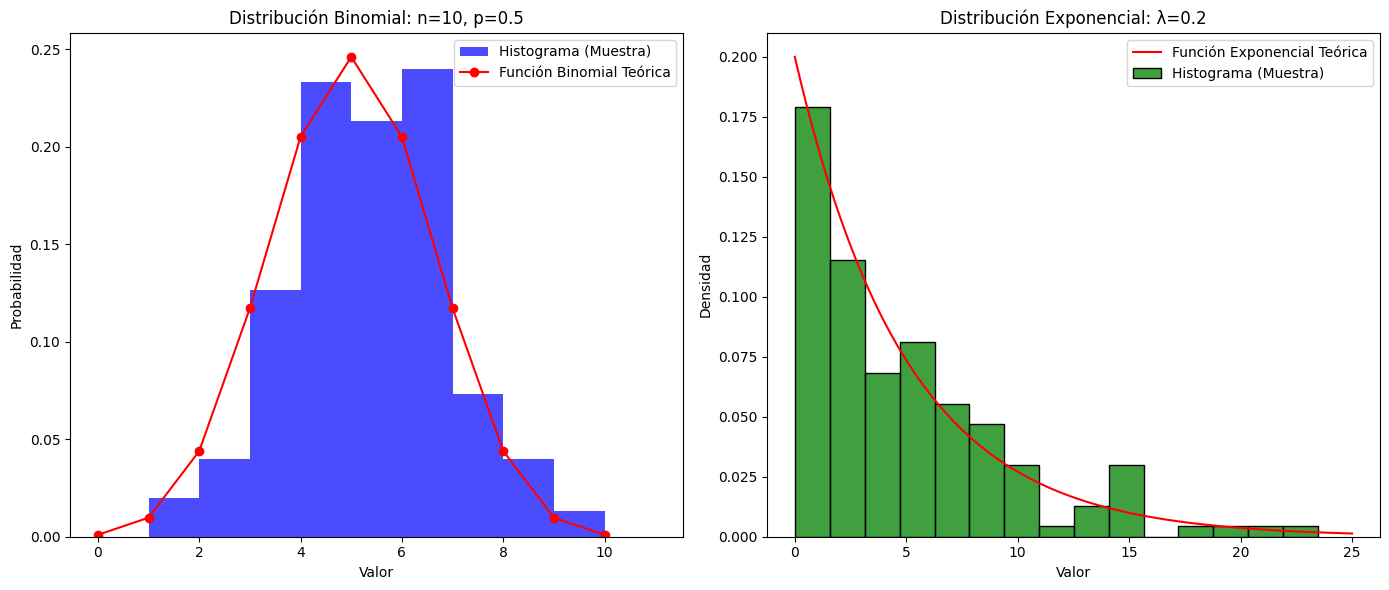

Distribución Binomial: Promedio = 4.873333333333333, Cuartiles = [4. 5. 6.], Desviación Estándar = 1.5844943111990724
Distribución Exponencial: Promedio = 5.02961012454527, Cuartiles = [1.32516805 3.7515363  7.48777311], Desviación Estándar = 4.720081595658986


In [58]:
# Parámetros para la distribución binomial y exponencial
n = 10    # número de ensayos para la binomial
p = 0.5   # probabilidad de éxito para la binomial
lam = 1/5  # parámetro lambda para la exponencial (promedio = 5)

# Generar las muestras aleatorias
muestra_binomial = np.random.binomial(n, p, 150)
muestra_exponencial = np.random.exponential(1/lam, 150)

# Histograma y comparación con la función de masa de probabilidad (pmf) y densidad teórica (pdf)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histograma Binomial
ax[0].hist(muestra_binomial, bins=range(n+2), density=True, alpha=0.7, color='blue', label='Histograma (Muestra)')
x = np.arange(0, n+1)
ax[0].plot(x, binom.pmf(x, n, p), 'ro-', label='Función Binomial Teórica')
ax[0].set_title(f'Distribución Binomial: n={n}, p={p}')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Probabilidad')
ax[0].legend()

# Histograma Exponencial
sns.histplot(muestra_exponencial, kde=False, stat="density", bins=15, color='green', ax=ax[1], label='Histograma (Muestra)')
x = np.linspace(0, 25, 100)
ax[1].plot(x, expon.pdf(x, scale=1/lam), 'r-', label='Función Exponencial Teórica')
ax[1].set_title(f'Distribución Exponencial: λ={lam}')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()
plt.show()

# Cálculos estadísticos
# Para la binomial
promedio_binomial = np.mean(muestra_binomial)
cuartiles_binomial = np.percentile(muestra_binomial, [25, 50, 75])
desviacion_std_binomial = np.std(muestra_binomial)

# Para la exponencial
promedio_exponencial = np.mean(muestra_exponencial)
cuartiles_exponencial = np.percentile(muestra_exponencial, [25, 50, 75])
desviacion_std_exponencial = np.std(muestra_exponencial)

# Mostrar resultados
print(f"Distribución Binomial: Promedio = {promedio_binomial}, Cuartiles = {cuartiles_binomial}, Desviación Estándar = {desviacion_std_binomial}")
print(f"Distribución Exponencial: Promedio = {promedio_exponencial}, Cuartiles = {cuartiles_exponencial}, Desviación Estándar = {desviacion_std_exponencial}")


## Interpretacion:   
Distribución Binomial (n=10, p=0.5):

La distribución binomial muestra un comportamiento simétrico con la mayoría de los valores concentrados alrededor del número 5, lo que es consistente con la probabilidad de éxito y fracaso iguales.
La muestra obtenida representa bien la distribución teórica, con una ligera variación que es normal en una muestra aleatoria.
Las medidas como el promedio y la dispersión indican que los datos están concentrados cerca del centro, con pocas desviaciones.
Distribución Exponencial (λ=0.2):

La distribución exponencial muestra la tendencia esperada de valores concentrados cerca de cero y una disminución gradual en la frecuencia de valores mayores.
El comportamiento de la muestra sigue de cerca la forma teórica, aunque hay pequeñas fluctuaciones típicas de una muestra aleatoria.
Las estadísticas indican que los valores más pequeños son más frecuentes y la dispersión de los datos está dentro de lo esperado para este tipo de distribución.

# **Problema 2**

### *Suponga un sistema de almacenamiento de datos en la nube utilizado por una gran empresa de comercio electrónico. Este sistema recibe y procesa continuamente transacciones de ventas de múltiples puntos de venta en línea. El tiempo entre llegadas de transacciones tiene promedio de 20 transacciones por minuto. La eficiencia del sistema y la velocidad de las consultas dependen en gran medida de la gestión de estos tiempos entre llegadas.*

In [59]:
lambda_scale = 20/60

Lo anterior es la división de 20 (que es el promedio de transacciones*minuto) dividido entre 60 (para convertir el resultado en escala a segundos como exigen las respuesta de los ejercicios)

#### *a. Probabilidad de que el tiempo entre dos transacciones consecutivas sea menor o igual a 2 segundos.*

In [60]:
t1 = 2
prob_a = expon.cdf(t1, scale=1/lambda_scale)
print(f'P(X<=2/60) = {prob_a}')

P(X<=2/60) = 0.486582880967408


Vemos que la probabilidad de que el tiempo entre dos transacciones consecutivas sea menor o igual a dos segundos es algo probable como algo no probable. Es decir, casi que se encuentra en 50/50, por lo que podríamos considerar que puede ser probable que suceda casi a la misma posibilidad de que no suceda. Esto nos puede dar un indicio de que es probable que el tiempo entre dos transacciones consecutivas puede durar más de 3 segundos con casi la misma probabilidad con la que puede durar menos (o igual) de 2 segundos. Para el negocio se podría proponer un analisis de más tiempo (en segundos), para mejorar la precisión del estudio por ejemplo.

#### *b. ¿Cuál es la probabilidad de que el tiempo entre dos transacciones consecutivas sea mayor a 10 segundos?*

In [61]:
t2 = 10
prob_b = 1 - expon.cdf(t2, scale=1/lambda_scale)
print(f'P(X>10/60) = {prob_b}')

P(X>10/60) = 0.03567399334725241


Vemos que la probabilidad de que el tiempo entre dos transacciones consecutivas sea mayor que 10 segundos, es de la forma e^(-lambda*x), sin embargo, se debe realizar de la anterior forma por la librería, cambiando P(X>x) por P(X<x), por ende quedaría de la forma 1 - e^(-lambda*x). Siguiendo esta lógica vemos porque lo anterior podría ser de las dos formas, pero seguimos la segunda forma por la librería 

Vemos también que la probabilidad de que el tiempo entre dos transacciones consecutivas sea mayor que 10 segundos es muy baja, lo que quiere decir que es más probable que sean más rápidas dos transacciones entre ellas, al ser posiblemente el mejor caso para el negocio que sea menor el tiempo entre transacciones, es decir, que se demoren menos de 10 segundos con mayor probabilidad, afectandolo de forma positiva.

#### *c. Si el sistema necesita realizar un respaldo rápido que toma exactamente 30 segundos, ¿cuál es la probabilidad de que no llegue ninguna transacción durante este período de respaldo?*

In [62]:
t3 = 30
prob_c = poisson.pmf(0, lambda_scale * t3)
print(f'P(X=0) = {prob_c}')

P(X=0) = 4.5399929762484854e-05


Recordemos que al tomar un evento en un intervalo de tiempo estaremos hablando de una PMF de la distribución de Poisson. Dejamos de usar una distribución exponencial, pues no tenemos en este punto sucesos consecutivos (dos *transacciones* entre sí), sino solo un suceso (ninguna *transacción*)

Vemos que la probabilidad de que, si el sistema necesita realizar un respaldo rápido que toma exactamente 30 segundos, la probabilidad de que no llegue ninguna transacción durante este período de respaldo es extremadamente baja. Lo que puede significar que el sistema se comporta de una excelente manera, pues la posibilidad de que quede no llegue ninguna transacción es muy baja, por lo que no deberíamos preocuparnos si se nos van a perder transacciones al realizar el respaldo rápido por ejemplo, si simulamos esa aplicación. 

#### *d. ¿Cuál es el tiempo esperado entre dos transacciones consecutivas?*

In [63]:
E_x = 1/lambda_scale
print(f'E(X) = {E_x}')

E(X) = 3.0


Recordemos que para hallar el tiempo esperado (E(X)) en una distribución exponencial, es de la forma 1/lambda o 'encontrar el inverso de lambda', donde lambda es el promedio de 20 transacciones por minuto, es decir, 20, y se transforma como 20/60 para convertir los minutos en segundos.

Lo anterior nos quiere decir que una vez llega una transacción, se espera que la otra llegue en 3 segundos, lo que podría significar que la llegada de transacciones que maneja el sistema es algo 'rápido', tomando como referencia por ejemplo, si lo estuvieramos comparando con llegadas de transacciones consecutivas de 30 o 60 segundos. Depende del negocio

#### *e. Si el sistema está diseñado para manejar ráfagas de datos, ¿cuál es la probabilidad de que ocurran al menos 5 transacciones en un intervalo de 10 segundos*

In [64]:
t4 = 10
k = 5
prob_e = 1 - poisson.cdf(k - 1, lambda_scale * t4)
print(f'P(X>=5) = {prob_e}')

P(X>=5) = 0.24350581185847064


Debemos encontrar 1 - P(X<5) o, lo que es lo mismo, 1 - P(X<=5-1) aplicando una CDF para una variable discreta X. Una explicación sencilla para usar una CDF de la distribución de Poisson es al encontrar P(X>=5) (al menos *5 transacciones*, pueden ser más) (no eventos consecutivos, sino eventos), entonces debemos encontrar la suma de P(X=0) hasta P(X=5) y a continuación restar 1 por el resultado, es decir, 1 - (P(X=0)+P(X=1)+P(X=2)+P(X=3)+P(X=4)+P(X=5)). Eso es lo que realizamos con la librería

Podemos observar del resultado que, la probabilidad de que le lleguen al sistema 5 transacciones en un intervalo de 10 segundos es algo baja, quiere decir, que es poco probable que lleguen 5 transacciones al sistema en ese intervalo de tiempo, lo que podría sugerir que pueden llegar muchas más transacciones en menos de 10 segundos, lo que podría significarle al negocio buenas noticias, pues entre las transacciones lleguen en menor tiempo, significa que pueden tener más transacciones que si llegan en mayor tiempo.

# **Problema 3**

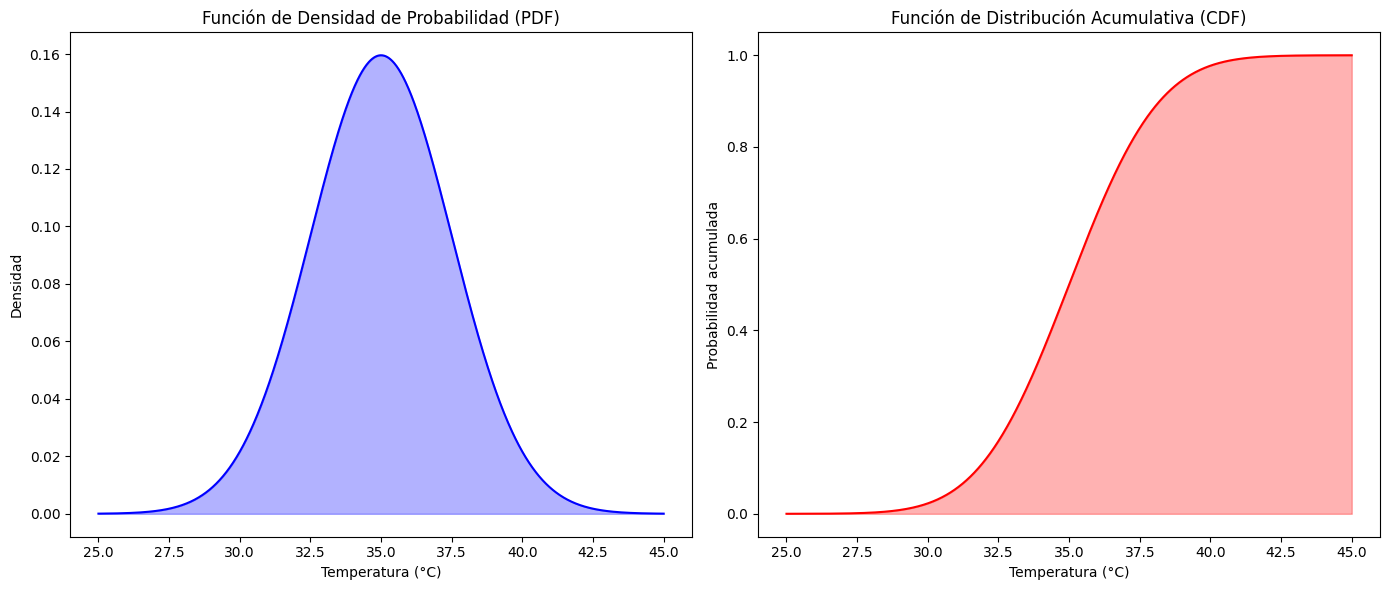

Probabilidad de que el sistema de enfriamiento se active (> 40°C): 0.0228
Porcentaje de tiempo en rango óptimo (30°C - 38°C): 86.22%
Temperatura para activar alerta temprana (10% superior): 38.20°C
Probabilidad de que el promedio de 5 servidores exceda los 37°C: 0.0368
Probabilidad de que más de 25 servidores superen los 41°C simultáneamente: 0.000000


In [65]:
# Parámetros de la distribución normal
mu = 35  # media
sigma = 2.5  # desviación estándar

# a) Gráficas PDF y CDF
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# PDF - Función de Densidad de Probabilidad
pdf = norm.pdf(x, mu, sigma)

# CDF - Función de Distribución Acumulada
cdf = norm.cdf(x, mu, sigma)

# Graficar PDF y CDF
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico PDF
ax[0].plot(x, pdf, 'b-', label="PDF")
ax[0].fill_between(x, 0, pdf, color='blue', alpha=0.3)
ax[0].set_title("Función de Densidad de Probabilidad (PDF)")
ax[0].set_xlabel("Temperatura (°C)")
ax[0].set_ylabel("Densidad")

# Gráfico CDF
ax[1].plot(x, cdf, 'r-', label="CDF")
ax[1].fill_between(x, 0, cdf, color='red', alpha=0.3)
ax[1].set_title("Función de Distribución Acumulativa (CDF)")
ax[1].set_xlabel("Temperatura (°C)")
ax[1].set_ylabel("Probabilidad acumulada")

plt.tight_layout()
plt.show()

# b) Probabilidad de que el sistema de enfriamiento se active (> 40°C)
prob_enfriamiento = 1 - norm.cdf(40, mu, sigma)
print(f"Probabilidad de que el sistema de enfriamiento se active (> 40°C): {prob_enfriamiento:.4f}")

# c) Porcentaje de tiempo que los servidores operan entre 30°C y 38°C
prob_optima = norm.cdf(38, mu, sigma) - norm.cdf(30, mu, sigma)
print(f"Porcentaje de tiempo en rango óptimo (30°C - 38°C): {prob_optima * 100:.2f}%")

# d) Temperatura para el 10% superior de los eventos de temperatura
temp_10p_superior = norm.ppf(0.90, mu, sigma)
print(f"Temperatura para activar alerta temprana (10% superior): {temp_10p_superior:.2f}°C")

# e) Probabilidad de que el promedio de 5 servidores exceda los 37°C
mu_media_5 = mu  # la media del promedio sigue siendo mu
sigma_media_5 = sigma / np.sqrt(5)  # la desviación estándar del promedio
prob_media_37 = 1 - norm.cdf(37, mu_media_5, sigma_media_5)
print(f"Probabilidad de que el promedio de 5 servidores exceda los 37°C: {prob_media_37:.4f}")

# f) Probabilidad de que más de 25 de 1000 servidores superen los 41°C simultáneamente
prob_41_grados = 1 - norm.cdf(41, mu, sigma)
prob_25_mas_41 = 1 - binom.cdf(25, 1000, prob_41_grados)
print(f"Probabilidad de que más de 25 servidores superen los 41°C simultáneamente: {prob_25_mas_41:.6f}")


## Conclusiones 

### a Gráficas PDF y CDF de la temperatura
- **Conclusión**: Las gráficas muestran cómo se distribuyen las temperaturas de los servidores. La gráfica de la **PDF** (Función de Densidad de Probabilidad) revela que las temperaturas cercanas a los 35°C son las más probables, con una disminución hacia los extremos (temperaturas menores a 30°C o mayores a 40°C son poco frecuentes). La **CDF** (Función de Distribución Acumulada) nos ayuda a entender la probabilidad acumulada de que la temperatura no exceda un cierto valor. La transición rápida de baja a alta probabilidad en el rango de 30°C a 40°C indica que la mayor parte del tiempo los servidores están dentro de este rango.

### b Probabilidad de que el sistema de enfriamiento se active (> 40°C)
- **Resultado**: La probabilidad de que el sistema de enfriamiento se active cuando la temperatura supere los 40°C es **0.0228** o **2.28%**.
- **Conclusión**: Esta baja probabilidad indica que el sistema de enfriamiento no se activará con frecuencia, ya que los servidores rara vez alcanzan temperaturas superiores a 40°C. Esto sugiere que el sistema está diseñado de manera eficiente, manteniendo las temperaturas bajo control en la mayoría de los casos.

### c Porcentaje de tiempo que los servidores operan entre 30°C y 38°C
- **Resultado**: Los servidores operan en el rango óptimo de temperatura entre 30°C y 38°C el **86.22%** del tiempo.
- **Conclusión**: Un porcentaje elevado de tiempo (más del 85%) en este rango muestra que los servidores operan de manera eficiente y en condiciones seguras la mayor parte del tiempo. El sistema de refrigeración está bien optimizado para mantener las temperaturas dentro de estos límites, minimizando el riesgo de sobrecalentamiento o enfriamiento excesivo.

### d Temperatura para el 10% superior de los eventos de temperatura
- **Resultado**: La temperatura que corresponde al 10% superior de los eventos es **38.20°C**.
- **Conclusión**: Las temperaturas por encima de 38.20°C representan el 10% más alto de los eventos de temperatura. Este valor puede usarse como umbral para generar alertas tempranas y tomar medidas preventivas antes de que las temperaturas alcancen niveles críticos, como el punto de activación del sistema de enfriamiento a los 40°C.

### e Probabilidad de que el promedio de 5 servidores exceda los 37°C
- **Resultado**: La probabilidad de que el promedio de temperatura de 5 servidores supere los 37°C es **0.0368** o **3.68%**.
- **Conclusión**: Aunque la probabilidad de que un solo servidor supere los 37°C es baja, existe una pequeña probabilidad de que el promedio de 5 servidores lo haga. Esto sugiere que, aunque raro, es posible que varios servidores simultáneamente experimenten temperaturas superiores a los 37°C, lo que podría requerir atención adicional o ajustes en la refrigeración para estos casos.

### f Probabilidad de que más de 25 de 1000 servidores superen los 41°C simultáneamente
- **Resultado**: La probabilidad de que más de 25 de los 1000 servidores superen los 41°C al mismo tiempo es extremadamente baja: **0.000000** o prácticamente **0%**.
- **Conclusión**: La posibilidad de que 25 o más servidores superen los 41°C de manera simultánea es prácticamente inexistente. Esto demuestra que el sistema de refrigeración es muy eficaz en mantener las temperaturas controladas incluso cuando se considera un gran número de servidores, lo que garantiza la estabilidad del sistema en su conjunto.

## Conclusión General
Las temperaturas de los servidores están bien reguladas. La probabilidad de que el sistema de enfriamiento se active es baja (solo el 2.28%), y los servidores operan en el rango óptimo de 30°C a 38°C el 86.22% del tiempo, lo que es una proporción muy alta. Los eventos de temperaturas extremas, como superar los 40°C o que más de 25 servidores alcancen los 41°C simultáneamente, son extremadamente raros. Esto indica que tanto el sistema de monitoreo como el de enfriamiento están funcionando eficientemente, garantizando condiciones de operación seguras y estables para los servidores.


# **Problema 4**
El archivo [Web_Server_Requests_G](https://uao-my.sharepoint.com/:x:/g/personal/jhurtado_uao_edu_co/EVDuYL-U2JJCvuoQv-eMpF0B1wJXz4hZyQDQUg4Gr5mdqw?e=QKi3jC) contiene un conjunto de datos que proporciona un registro histórico (sintético) de la tasa de llegada de solicitudes que un servidor web ha experimentado durante un intervalo de tiempo de 5 minutos. Esta información es esencial para comprender y gestionar la carga del servidor, planificar la infraestructura, y garantizar un rendimiento óptimo en un entorno de servidor web real.

In [84]:
web_server_data = pd.read_csv("data/web_server_requests_G.csv")

In [85]:
web_server_data.head()

,Timestamp,ArrivalRate
0,00:00,1
1,05:00,2
2,10:00,8
3,15:00,1
4,20:00,1


In [86]:
web_server_data.describe()

,ArrivalRate
count,104833.000000
mean,3.923049
std,3.265788
min,0.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,9.000000


In [87]:
# Función para convertir "mm:ss" a minutos totales
def timestamp_a_minutos(ts):
    minutos, segundos = map(int, ts.split(':'))
    total_minutos = minutos + segundos / 60
    return total_minutos

#### *a) Identificar patrones de tráfico web como horas pico de actividad y momentos de menor demanda*

Analizamos la tasa de llegada de solicitudes para identificar horas pico y momentos de menor demanda.

In [88]:
tasa_llegada_promedio = web_server_data.groupby("Timestamp")["ArrivalRate"].mean().reset_index()

tasa_llegada_promedio["Minutos"] = tasa_llegada_promedio["Timestamp"].apply(timestamp_a_minutos)

tasa_llegada_promedio = tasa_llegada_promedio.sort_values("Minutos")

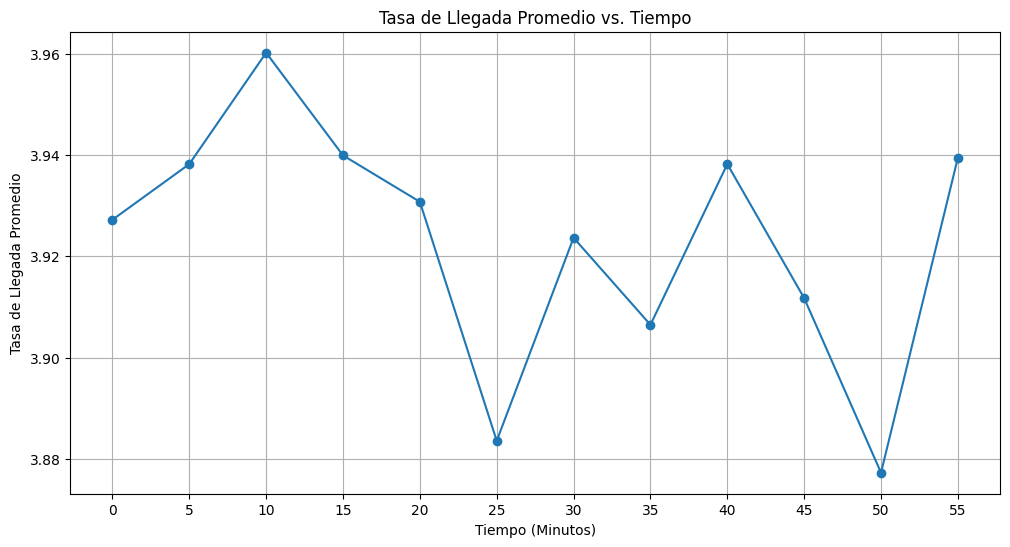

In [89]:
plt.figure(figsize=(12,6))

plt.plot(tasa_llegada_promedio["Minutos"], tasa_llegada_promedio["ArrivalRate"], marker="o")

plt.xlabel("Tiempo (Minutos)")
plt.ylabel("Tasa de Llegada Promedio")
plt.title("Tasa de Llegada Promedio vs. Tiempo")
plt.xticks(range(0, 60, 5))

plt.grid(True)
plt.show()

Al observar el gráfico, observamos diversos factores a analizar:

1. **Picos de actividad**:

   - Se observa un claro pico en la tasa de llegada alrededor de los **10 minutos**, con un valor promedio cercano a 3.96 solicitudes.

   - Otro pico significativo ocurre alrededor de los **40 minutos**, lo que indica un aumento de la demanda en estos intervalos.

2. **Momentos de menor demanda**:

   - Existen varios momentos donde la tasa de llegada es considerablemente más baja, como en los **25 minutos** y **50 minutos**, donde la tasa de llegada promedio llega a caer por debajo de 3.88 solicitudes.

   - Se observan fluctuaciones pronunciadas, lo que sugiere que la demanda del servidor varía significativamente durante estos intervalos.

3. **Variabilidad moderada**:

   - A lo largo del tiempo, la tasa de llegada parece fluctuar dentro de un rango relativamente estable, variando entre aproximadamente 3.88 y 3.96 solicitudes por intervalo. Esto sugiere que, aunque hay fluctuaciones, la carga general del servidor no es extremadamente volátil.

#### *b) Ajuste una distribución gamma a sus datos de "Arrival Rate", trace el histograma de sus datos junto con la función de densidad de probabilidad (pdf) de la distribución gamma ajustada y muestre los parámetros de la distribución gamma ajustada*

Ajustamos una distribución gamma a los datos para modelar la variabilidad en la tasa de llegada.

In [90]:
# Eliminar ceros, ya que la distribución gamma está definida para valores positivos
arrival_rates_no_cero = web_server_data["ArrivalRate"][web_server_data["ArrivalRate"] > 0]

In [91]:
# Ajustar la distribución gamma
params = gamma.fit(arrival_rates_no_cero, floc=0)  # Forzamos loc=0

# Obtener los parámetros shape y scale
shape, loc, scale = params

print(f"Parámetros ajustados de la distribución gamma:\nShape (α): {shape}, Loc: {loc}, Scale (θ): {scale}")

Parámetros ajustados de la distribución gamma:
Shape (α): 1.2874523635684387, Loc: 0, Scale (θ): 3.0472573931209608


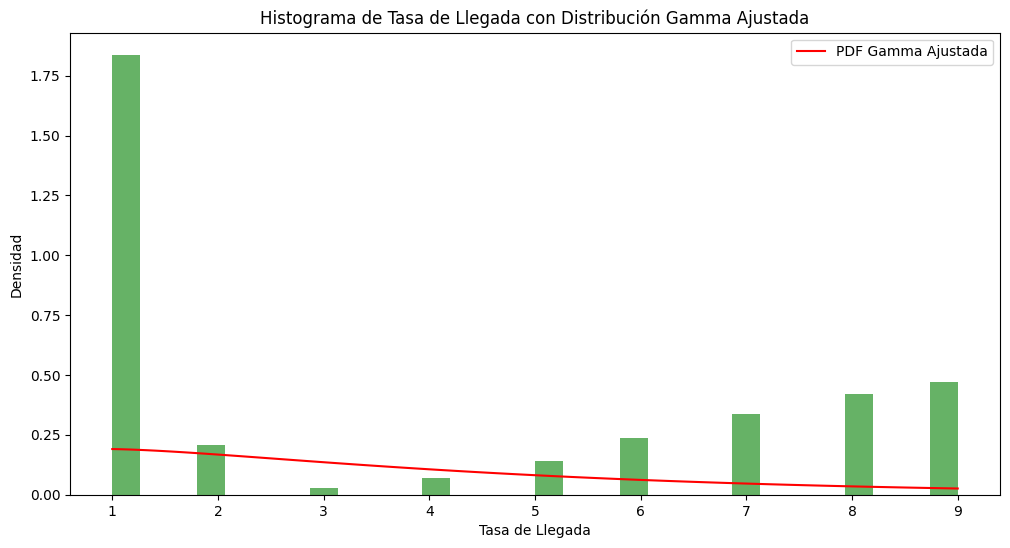

In [92]:
plt.figure(figsize=(12,6))

# Histograma
count, bins, ignored = plt.hist(arrival_rates_no_cero, bins=30, density=True, alpha=0.6, color="g")

# Graficar la función de densidad de probabilidad (pdf) ajustada
x = np.linspace(min(arrival_rates_no_cero), max(arrival_rates_no_cero), 100)
pdf_ajustada = gamma.pdf(x, a=shape, loc=loc, scale=scale)
plt.plot(x, pdf_ajustada, "r-", label="PDF Gamma Ajustada")

plt.xlabel("Tasa de Llegada")
plt.ylabel("Densidad")
plt.title("Histograma de Tasa de Llegada con Distribución Gamma Ajustada")
plt.legend()
plt.show()

A partir del histograma de la tasa de llegada de solicitudes y la función de densidad ajustada con una distribución gamma, podemos llegar a las siguientes conclusiones:

1. **Alta concentración en tasas bajas**:

   - La mayoría de las solicitudes están concentradas en valores bajos, especialmente alrededor de **1 solicitud por intervalo**, lo que nos indica que, en la mayoría de los intervalos, el servidor maneja pocas solicitudes. Este patrón es bastante típico en escenarios de tráfico web con fluctuaciones.

2. **Distribución de cola larga**:

   - Aunque no es tan común, también vemos algunos intervalos con tasas de llegada más altas (entre 7 y 9 solicitudes), lo que indica la presencia de lo que llamamos una **cola larga**. Esto suele ocurrir en sistemas que experimentan picos de demanda poco frecuentes.

3. **Ajuste de la distribución gamma**:

   - El ajuste de la distribución gamma parece capturar bien la tendencia general de los datos, aunque no refleja perfectamente los valores más altos. Sin embargo, para la mayor parte de los datos, el ajuste es bastante acertado.
   
   - **Parámetros ajustados**:
     - **Shape (α)**: 1.287
     - **Loc**: 0 (fijado a 0 para este análisis)
     - **Scale (θ)**: 3.047

4. **Interpretación de los parámetros**:

   - El parámetro **shape (α = 1.287)** sugiere que la distribución se parece a una exponencial, lo que significa que la mayoría de los intervalos tienen pocas solicitudes y sólo unos pocos intervalos presentan valores extremos.
   
   - El parámetro **scale (θ = 3.047)** nos dice que, en promedio, la tasa de llegada se agrupa alrededor de 3 solicitudes por intervalo.

#### *c) ¿Cuál es la probabilidad de que el servidor reciba más de 8 solicitudes durante el próximo intervalo?*

In [93]:
# Calcular la probabilidad de que ArrivalRate > 8
prob_mas_de_8 = 1 - gamma.cdf(8, a=shape, loc=loc, scale=scale)

print(f"La probabilidad de que el servidor reciba más de 8 solicitudes en el próximo intervalo es: {prob_mas_de_8}")

La probabilidad de que el servidor reciba más de 8 solicitudes en el próximo intervalo es: 0.11583364360768855


La probabilidad es aproximadamente **11.58%**. Esto quiere decir que, aunque es posible que el servidor enfrente más de 8 solicitudes en un intervalo, no es algo que ocurra con mucha frecuencia. En otras palabras, en la mayoría de los casos, el servidor no estará sobrecargado con más de 8 solicitudes, pero tampoco podemos descartar la posibilidad por completo.

#### *d) ¿Cuál es la probabilidad de que la tasa de llegada supere un umbral crítico de, por ejemplo, 15 solicitudes por minuto, en el próximo intervalo?*

In [94]:
# Calcular la probabilidad de que ArrivalRate > 15
prob_mas_de_15 = 1 - gamma.cdf(15, a=shape, loc=loc, scale=scale)

print(f"La probabilidad de que la tasa de llegada supere 15 solicitudes por minuto en el próximo intervalo es: {prob_mas_de_15}")

La probabilidad de que la tasa de llegada supere 15 solicitudes por minuto en el próximo intervalo es: 0.013463968214470712


La probabilidad de que la tasa de llegada supere el umbral crítico de 15 solicitudes por minuto en el próximo intervalo es de aproximadamente 1.35%. Esto indica que es extremadamente raro que el servidor tenga que lidiar con una carga tan alta en un solo intervalo.

#### *e) Si la capacidad máxima de procesamiento del servidor es de 20 solicitudes por intervalo, ¿Cuál es la probabilidad de superar la capacidad máxima de procesamiento del servidor en el siguiente intervalo?*

In [95]:
# Calcular la probabilidad de que ArrivalRate > 20
prob_mas_de_20 = 1 - gamma.cdf(20, a=shape, loc=loc, scale=scale)

print(f"La probabilidad de superar la capacidad máxima de procesamiento del servidor en el siguiente intervalo es: {prob_mas_de_20}")

La probabilidad de superar la capacidad máxima de procesamiento del servidor en el siguiente intervalo es: 0.0028023128147461884


La probabilidad de que el servidor reciba más de 20 solicitudes en un solo intervalo, superando su capacidad máxima, es de aproximadamente **0.28%**. Este valor indica que el riesgo de que el servidor se vea sobrecargado en un solo intervalo es muy bajo. Por lo tanto, bajo condiciones normales, el servidor debería funcionar sin problemas frente a su límite de procesamiento.